## 路遥 PB12203068

### 1. In an evolutionary algorithm where all chromosomes are represented by binary strings of length n, k-point crossover (1 ≤ k ≤ n-1) and uniform crossover are often used.

(a) Given two chromosomes, describe how a 2-point crossover works (Assume that
the chromosome length is greater than 3). You can use a pseudo-code procedure
or an example to illustrate it. [7pt]

In [17]:
p1 = [1,0,0,1,0] # parent 1
p2 = [1,0,1,0,0] # mother 2
c1 = zeros(p1) # children 1
c2 = zeros(p1) # children 2
cuts = sort(randperm(length(p1))[1:2])

index = 1:cuts[1]
c1[index] = p1[index]
c2[index] = p2[index]
flip = 1
for i in 2:length(cuts)
    index = cuts[i-1]+1:cuts[i]
    if flip == 0
        c1[index] = p1[index]
        c2[index] = p2[index]
    else
        c1[index] = p2[index]
        c2[index] = p1[index]
    end
    flip = flip$1
end
cuts, c1, c2


([2,4],[1,0,1,0,0],[1,0,0,1,0])

(b) Given two chromosomes, describe how the uniform crossover works. You can use
a pseudo-code procedure or an example to illustrate it. [7pt]

In [22]:
p1 = [1,0,0,1,0] # parent 1
p2 = [1,0,1,0,0] # mother 2
c = zeros(p1) # children 1

for i in eachindex(c)
    rand()<0.5?(c[i]=p1[i]):(c[i]=p2[i])
end
c

5-element Array{Int64,1}:
 1
 0
 0
 0
 0

(c) Is the (n-1)-point crossover the same as the uniform crossover? If not, explain the
differences. [6pt]

**ANS:**

No. For uniform crossover, the c[i] and c[i+1] can be taken from the same parent, but for (n-1)-point crossover, c[i] and c[i+1] have to be taken from different parents.

### 2. Penalty functions have often been used in constrained optimisation to convert a constrained problem into an unconstrained one.

\begin{align*} & \Phi \left( x\right) =f\left( x\right) +\sum _{i}r_{i}G_{i}\left( x\right)+\sum c_{j} H_{j}\left( x\right) \end{align*}

(a) Discuss the major advantages and potential problems of the penalty function
approach to constrained optimisation. [5pt]

**ANS:**

Pros
- More general and easy to use. Because other methods such as *Special  Representation*, *Special variation  operator*, *Repair  operator* requires deep domain knowledge, sometimes impossible  to  design.

Cons
- It's difficult to achieve a balance between objective function and constraints violation. 
- This will transform the the fitness landscapes, somtimes makes it impossible to find a feasible solution.


(b) Explain why and how an inappropriate penalty function can make finding the
constrained global optimum difficult. You may use an example to illustrate the
reason. [10pt]

<img  src="http://raw.githubusercontent.com/AStupidBear/Pictures/master/constrained_global_optimum.png"/>

**ANS:**

If $r$ is very large, the $\Phi(x)$ will be dominated by the penalty term. If we choose an initial point C from top left corner, a feasible region, the population will be stuck in the feasible region, not likely to cross the infeasible region and then reach the global optimum in the bottom right corner.

(c) When a penalty function is used, can we guarantee that a feasible solution will be
found? Explain your answer. [5pt]

**ANS:**
No
- The algorithm can only find the approximate minimum $x^{*}$ of $\Phi(x)$, not a feasible solution. Even if $x^{*}$ has small constraint vialations, it might still be infeasible. 
- If $G(x)$ is much smoother than $f(x)$, then $\Phi(x)$ will be dominated by $f(x)$. For example, if $\Delta G\left( x\right) \ll \Delta f\left( x\right) $, then $\Delta \Phi \left( x\right) \approx \Delta f\left( x\right) $. Then the algorithm is likely to find an infeasible solution.

### 3. Consider a (1+1) EA with one-bit mutation. What is the Expected Running Time (ERT) of this algorithm on OneMax problem? (Please give the detailed steps of your derivations) [15pt]

<img src="http://raw.githubusercontent.com/AStupidBear/Pictures/master/fitness_level_for_onemax.png" />

**ANS**: First, just copy Prof. Tang's slides, then explain why.
1. Use fitness leval method. Partition the solution space $\left\{ 0,1\right\} ^{n}$ into n+1 fitness levels $[0,...,n]$
2. The probability of transition from i-level to i+1-level in one step is bigger than selecting a 0-point frome the leftover n-i 0-points, ie $\left( \begin{matrix} n\\ i\end{matrix} \right) \left( \dfrac {1} {n}\right) \left( 1-\dfrac {1} {n}\right) ^{n-i}$, because we can achieve this in other ways such as flipping some 1-points to zero and flip more 0-points to 1.
3. The expected steps which a transition from i to i+1 needs to take 
$$\begin{align*} & \dfrac {1} {p}\leq \dfrac {1} {n-i}n\left( 1+\dfrac {1} {n-1}\right) ^{n-1}\\ & \rightarrow \dfrac {n} {n-i}e\end{align*} $$
4. Sum them up we get 
$$\sum _{i-0}^{n-1}\dfrac {n e } {n-i}\rightarrow n e\ln n$$


### 4. Statistics and Experiments

(a) Name 4 problems that emerge when measuring the runtime of an optimization
algorithm as the consumed CPU seconds (real clock time) during benchmarking.
[5pt]

**ANS**:
- Strongly machine dependent
- Granularity of about 10ms: many things seem to happen at the same time
- Can be biased by "outside effects", e.g., OS, scheduling, other processes, I/O, swapping, ...
- Inherently incomparable. Hardware, software, OS, etc. all have nothing to do with the optimization algorithm itself and are relevant only in a specific application.

(b) Describe an alternative approach. Name 5 of its advantages or disadvantages. [5pt]

**ANS**: Function Evaluations (Measure the number of fully constructed and tested candidate solutions)
- Pros
 - Results in many works reported in this format (or FEss can be deduced)
 - Machine-independent measure
 - Cannot be influenced by "outside effects"
 - In many optimization problems, computing the objective value is the most time consuming task
- Cons
 - No clear relationship to real runtime
 - Does not contain “hidden complexities” of algorithm
 - 1 FE: very different costs in different situations!
 - Relevant for comparing algorithms, but not so much for the practical application

(c) Name at least five problems with the experiment description below [10pt]:

“We create an instance of the Traveling Salesman Problem (TSP) composed of 20
cities in Hubei. We then conducted 80 runs with our algorithm on this one instance.
The algorithm produces tours with an arithmetic mean length of 900km +/- a
standard deviation of 1011km. This is a very good result.”

**ANS**:
- It's wrong to create a instance for a well-known problem like TSP, because few researchers know this place and therefore cannot replicate his experiment.
- 20 cities is not enough to test an algorithm.
- It's wrong to apply algorithms to just a single problem instance. He should apply algorithm to multiple different instances.
- He should also apply his algorithm to different problems beyond TSP.
- Robust statistic measures are Median and Quantiles. When describing a random process, we should always use the median instead of the mean. Because
 - the median and quantiles is more robust towards outliers
 - the mean and standard deviation is useful (only) for symmetric distributions and badly represents skewed distributions.
- He hasn't mentioned the runtime of his experiments.
- He should use existing benchmark suites and compare his results with literature. Only then could he say that "this is a very good result".

### 5. Application: Chemistry

A chemistry company produces a chemical C as result of a reaction of two other chemicals A
and B. This reaction takes place at a temperature. Heating the pot containing A and B costs
1000 RMB for each temperature unit (1°C). We want to reduce this cost by adding catalysts
to the reaction. 40 chemicals (K 1 to K 40 ) are available as catalysts. You may use any combination of them, but you can only add at most 3 Liters of each catalyst into the pot.

You have a simulation program which takes as input a text file with the amount of each
catalyst and produces a text file with the temperature T needed for the reaction as output. How
do you find the right mixture of catalyst?

Write something for each of the questions below. If an element is not needed, say so!

(a) What is a “solution” (solution/problem space) in this context? [2pt]

**ANS**: a text file with the amount of each catalyst

(b) How would you represent such solutions internally for the optimization algorithms?
In other words, how would you encode them and which search space would you use?
[3pt]

**ANS**: $[0,3]^{30}$, ie each $x_{i}$ represents the amount of the ith catalyst and $x_{i}$ ranges from 0 to 3 in the unit of liter.

(c) Define the search operations which you would employ. It is sufficient to shortly
describe what they do. [4pt]

**ANS**: My search operation is to sample the next point based on the current and past evaludated points.  For hill-climbing in NCS, I just sample the next point using Gaussian distribution with the current point as mean. $x' \sim N\left( x,\Sigma \right) $ where $\Sigma$ is a diagonal matrix adapted through time.

(d) Define the objective function and whether it is maximized or minimized. (a textual
description or short pseudo-code is enough) [4pt]

**ANS**: The objective function is $T(k)$, and the goal is to $$\min _{\overrightarrow {k}}T\left( \overrightarrow {k}\right) $$

In [23]:
function T(K) # T denotes the temperature, K[i] represent the amount of Ki
    1/norm(K) # just use as an example
end

T (generic function with 1 method)

(e) Which optimization algorithm(s) would you use and why? Provide the pseudo-code
of the algorithm. [4pt]

**ANS**: I will use NCS Algorithm. For pseudo-code, see the appendix.
- I don't choose GA because it's not the most efficient algorithm for real-valued optimizations.
- Assume the fitness function is non-convex and multi-modal
- Because it encourages the distances between probability distributions corresponding to search processes and therefore quite good at optimizing functions with mutiple local minima. 
- After that I may try CMA-ES with the returned results of NCS to get more precise solutions.

(f) Describe a set of experiments (including parameter settings) which you would use to
configure your algorithm! [4pt]

**ANS**: See the appendix.

(g) How would you check whether your method is efficient? [4pt]

**ANS**: I will plot a *progress diagram* for my method and other methods. In detail,
- Set the maximum number of function evaluations and run for several times, using my method or other methods.
- Plot the median of the best objective value reached over time, over all
runs.
- If the curve of my method drops more steeply than other methods, I may think my method is efficient.

See also the appendix for a single run experiment progress diagram.

### 6. Appendix

Just use the following $T(K)$ as an example. $T$ denotes the temperature, $K[i]$ represents the amount of $K_{i}$

In [1]:
function T(K) 
    sumabs2(K.-15)/length(K) 
end

T (generic function with 1 method)

Use NCS to get a quick and dirty result, although the function we use here is convex therefore there's no need to use NCS for this example. 

The lower bound and upper bound of this experiment are 0 and 30 for each component of $K$. Population size $N$ is 50, the maximum iteration $T$ is 1000.

In [ ]:
reload("NCS")
K0, T0, progress = NCS.fmin(T, zeros(30), 30ones(30), disp=false, T=1000, N=50)

Run this experiment 10 times and plot the average progress cure.

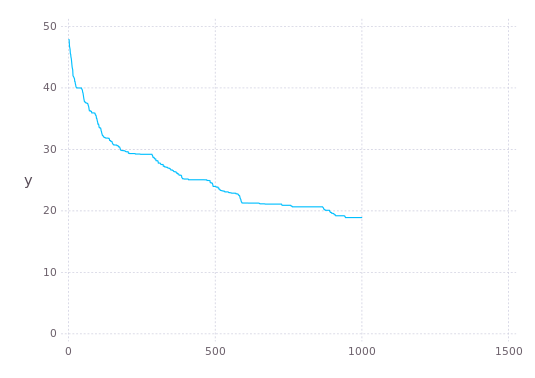

In [20]:
progresses = []
for i = 1:10
    ~, ~, progress = NCS.fmin(T, zeros(30), 30ones(30), disp=false, T=1000, N=50)
    push!(progresses, progress)
end

using Gadfly
Gadfly.plot(y=mean(progresses), Geom.line)

Refine K0 using CMA-ES

In [ ]:
reload("CMA")
K0, T0 = CMA.cmaes(T, K0);

Of coure, the true minimum of T(K) is zero, and the corresponding K is 15 for every component.

In [14]:
mean(K0), std(K0), T0

(15.00000003591025,1.2806547283126865e-7,1.714361914528501e-14)

### 7. Souce Code of NCS

In [ ]:
"""
    import NCS
    rastrigin(x) = 10*length(x) + sum(x.^2 .- 10*cos.(2π*x))
    NCS.fmin(rastrigin, -ones(2), ones(2))
"""

module NCS

export Particle, init_pop, optimize
const r = 0.99
const λrange= 0.1
const epoch = 100
type Particle{T,N}
    x::Array{T,N} # position
    v::T # value
    vn::T # normalized value
    x′::Array{T,N} # trial position
    v′::T  # trial value
    vn′::T # normalized tial value
    σ::Array{T,N} # diagnol elements of Σ (sampling covariance matrix)
    Corr::T # correlation value
    Corr′::T # tiral correlation value
    flag::T # successful trial in an epoch
    λ::T # λ>0 is a parameter to balance exploration and exploitation.
end
Base.show(p::Particle) = println("x=",p.x," f(x)=",p.v)
function init_pop(f,l,u; N=10)
    g = [Particle(l+(u-l).*rand(size(l)),Inf,Inf,
        l+(u-l).*rand(size(l)),Inf,Inf,
        (u-l)/N,Inf,Inf,0.0,1.0) for i=1:N]
    for p in g
        p.v = f(p.x)
    end
    g
end
function BD(p, q)
    Corr = Corr′ = 0
    @inbounds for d in eachindex(p.x)
        Δx = p.x[d] - q.x[d]
        Δx′ = p.x′[d] - q.x[d]
        σ2 = p.σ[d]^2; σ2′ = q.σ[d]^2
        c = (σ2+σ2′)/2
        Corr += 1/8*Δx^2/c + 1/2*(log(c) - 0.5*(log(σ2) + log(σ2′)))
        Corr′+= 1/8*Δx′^2/c + 1/2*(log(c) - 0.5*(log(σ2) + log(σ2′)))
    end
    Corr,Corr′
end
function inbounds!(x, l, u)
  @inbounds for i in eachindex(x)
    if x[i] < l[i]
      x[i] = -x[i] + 2*l[i]
    elseif x[i] > u[i]
      x[i] = -x[i] +2*u[i]
    end
  end
end

function search!(g, l, u)
    for p in g
        p.x′ .= p.x .+ p.σ.*randn(size(p.x))
        inbounds!(p.x, l, u)
    end
end

function fitness_values!(f, g)
    Threads.@threads for p in g
        p.v′ = f(p.x′)
    end
end

function normalize_fitness_values!(g)
    v_min = minimum(min(p.v,p.v′) for p in g)
    for p in g
        p.vn = p.v - v_min;
        p.vn′ = p.v′ - v_min;
        p.vn,p.vn′ = p.vn/(p.vn+p.vn′),p.vn′/(p.vn+p.vn′)
    end
end
function correlation_values!(g)
    for p in g
        p.Corr = p.Corr′ = Inf
        for q in g
            c,c′ = BD(p,q)
            if c < p.Corr
                p.Corr = c
            end
            if c′ < p.Corr′
                p.Corr′ = c′
            end
        end
    end
end
function normalize_correlation_values!(g)
    for p in g
        p.Corr,p.Corr′ = p.Corr/(p.Corr+p.Corr′+1e-20),
        p.Corr′/(p.Corr+p.Corr′+1e-20)
    end
end
function selection!(g)
    for p in g
        if p.λ*p.Corr′ > p.vn′
            p.x = copy(p.x′)
            p.v = p.v′
            p.flag += 1.0
        end
    end
end

function update_parameters!(g,t,T)
    for p in g
        p.λ = 1 + λrange*(1-t/T)*randn()
    end
    if mod(t, epoch) == 0
        for p in g
            if p.flag/epoch > 0.2
                p.σ /= r;
            elseif p.flag/epoch < 0.2
                p.σ *= r;
            end
            p.flag = 0.0
        end
    end
end
function best!(p0,g)
    for p in g
            if p.v < p0.v
            p0.x = copy(p.x)
            p0.v = p.v
        end
    end
end
function optimize!(f, g, l, u; T=10, disp=false)
    p0 = deepcopy(g[1])
    progress = typeof(p0.v)[]
    for t = 0:T
        search!(g, l, u)
        fitness_values!(f, g)
        normalize_fitness_values!(g)
        correlation_values!(g)
        normalize_correlation_values!(g)
        selection!(g)
        best!(p0, g)
        push!(progress, p0.v)
        update_parameters!(g, t, T)
        if disp == true && mod(t,100) == 0
            show(p0)
        end
    end
    p0.x, p0.v, progress
end

export fmin
function fmin(f, l, u; N=50, T=100, disp=true)
  g = init_pop(f, l, u; N=N)
  x0,y0 = optimize!(f, g, l, u; T=T, disp=disp)
end
    
end # end of module
